# Import the libraries

**Libraries Required**

* _Numpy_ `pip install numpy`
* _Pandas_ `pip install pandas` 
* _Seaborn_ `pip install seaborn`
* _Matplotlib_ `pip install matplotlib`

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing COVID-19 Dataset

**Download the dataset from the link given below :**

* COVID-19 Confirmed Cases - https://bit.ly/39hXM8s

In [35]:
covid_dataset = pd.read_csv('./covid_confirmed.csv')
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


**Check the shape of the dataframe**

In [36]:
covid_dataset.shape

(266, 186)

## Delete the useless columns

In [37]:
covid_dataset.drop(['Lat','Long'], axis=1, inplace=True)
covid_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
4,NaN,Angola,0,0,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


## Aggregate the rows by the country

In [38]:
covid_aggregated = covid_dataset.groupby('Country/Region').sum()

In [39]:
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
Albania,0,0,0,0,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
Algeria,0,0,0,0,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
Andorra,0,0,0,0,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
Angola,0,0,0,0,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


**Check the new shape of the aggregated dataset**

In [40]:
covid_aggregated.shape

(188, 182)

## Visualizing data related to some countries like India, China, US

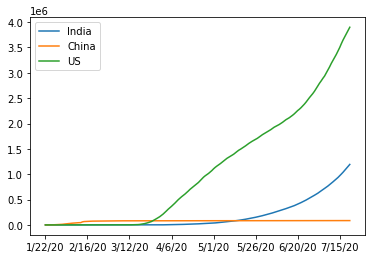

In [41]:
covid_aggregated.loc['India'].plot()
covid_aggregated.loc['China'].plot()
covid_aggregated.loc['US'].plot()
plt.legend()

## Calculating a good measure

**We need to find a good measure represented as a number, describing the spread of the virus in the country.**

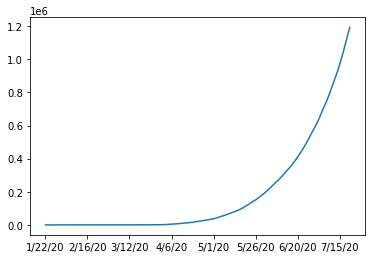

In [42]:
covid_aggregated.loc['India'].plot()

## Caculating the first derivative of the curve

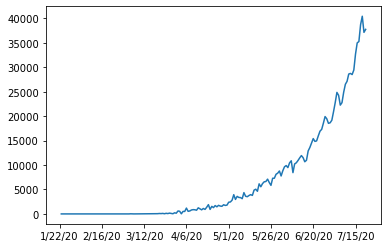

In [43]:
covid_aggregated.loc['India'].diff().plot()

### Find Maxmimum Infection Rate for India

In [44]:
covid_aggregated.loc['India'].diff().max()

40425.0

### Find Maxmimum Infection Rate for China

In [45]:
covid_aggregated.loc['China'].diff().max()

15136.0

### Find Maxmimum Infection Rate for US

In [46]:
covid_aggregated.loc['US'].diff().max()

77255.0

###  Find Maximum Infection Rate for all the countries

In [47]:
countries = list(covid_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(covid_aggregated.loc[country].diff().max())
covid_aggregated['Maximum Infection Rate'] = max_infection_rates

In [48]:
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,Maximum Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34455,34740,34994,35070,35229,35301,35475,35526,35615,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,3571,3667,3752,3851,3906,4008,4090,4171,4290,119.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,19689,20216,20770,21355,21948,22549,23084,23691,24278,607.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,858,861,862,877,880,880,880,884,884,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,525,541,576,607,638,687,705,749,779,62.0


### Create a new dataframe with only Maximum Infection Rate column 

In [49]:
covid_data = pd.DataFrame(covid_aggregated['Maximum Infection Rate'])
covid_data

,Maximum Infection Rate
Country/Region,
Afghanistan,915.0
Albania,119.0
Algeria,607.0
Andorra,79.0
Angola,62.0
...,...
West Bank and Gaza,501.0
Western Sahara,4.0
Yemen,116.0


# Import World Happiness Report Dataset

**Download dataset from the link given below :**

* World Happiness Report 2019 - https://bit.ly/2ZQFSXg

In [50]:
happiness_report = pd.read_csv('./happiness_report.csv')
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Check the shape of the dataset**

In [51]:
happiness_report.shape

(156, 9)

**Drop unnecessary columns like Overall Rank, Score, Generosity, Perceptipns of corruption**

In [52]:
columns_to_drop = ['Overall rank','Score','Generosity','Perceptions of corruption']
happiness_report.drop(columns_to_drop, axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


**Change the indices of the dataframe**

In [53]:
happiness_report.set_index('Country or region', inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### COVID-19 final dataset

In [54]:
covid_data.head()

,Maximum Infection Rate
Country/Region,
Afghanistan,915.0
Albania,119.0
Algeria,607.0
Andorra,79.0
Angola,62.0


### World Happiness Report final dataset

In [55]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Join the both final datasets we have prepared

In [56]:
data = happiness_report.join(covid_data).copy()
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


### Correlation Matrix

In [57]:
data.corr()
# it is representing the currelation between every two columns of our dataset

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.136931
Social support,0.754906,1.000000,0.719009,0.447333,0.110872
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.124985
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.072960
Maximum Infection Rate,0.136931,0.110872,0.124985,0.072960,1.000000


# Visualization of Results

**Our analysis isn't finished unless we visualize the results in terms figures and graphs so that everyone can understand what we have got out of our analysis**

In [58]:
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Maximum Infection Rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


### Plotting GDP vs Maximum Infection Rate

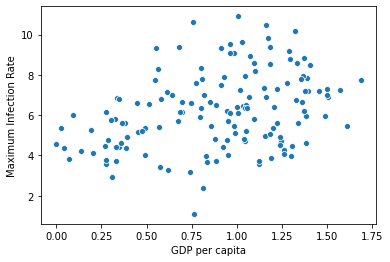

In [59]:
x = data['GDP per capita']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y))

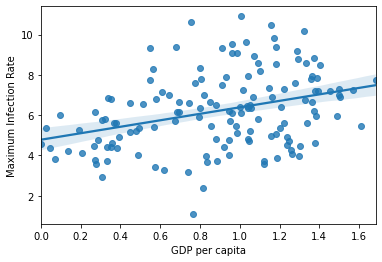

In [60]:
sns.regplot(x,np.log(y))

### Plotting Social support vs Maximum Infection Rate 

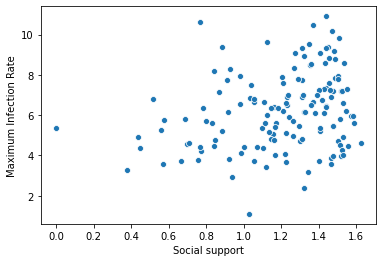

In [61]:
x = data['Social support']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y))

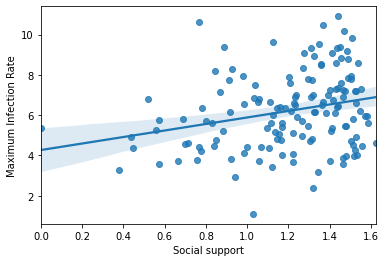

In [62]:
sns.regplot(x,np.log(y))

### Plotting Health life expectancy vs Maximum Infection Rate 

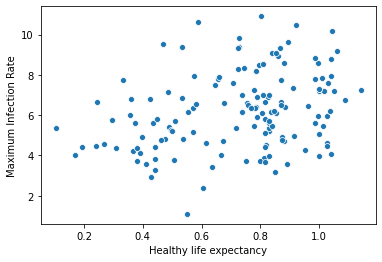

In [63]:
x = data['Healthy life expectancy']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y))

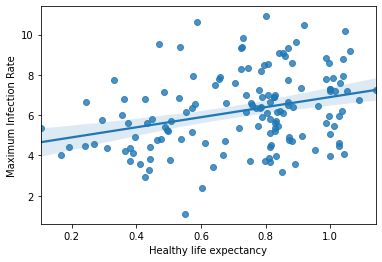

In [64]:
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs Maximum Infection Rate 

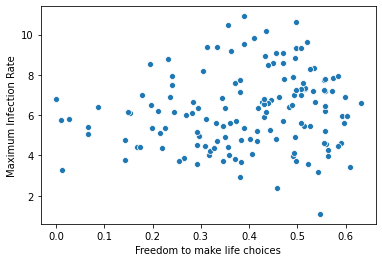

In [66]:
x = data['Freedom to make life choices']
y = data['Maximum Infection Rate']
sns.scatterplot(x,np.log(y))

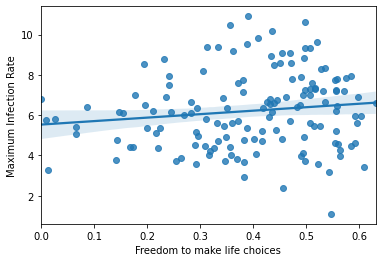

In [67]:
sns.regplot(x,np.log(y))

# Conclusion

**From the above analysis, we came to a conclusion that people who are living in more developed countries are more prone to getting infected by the novel Corona virus as compared to those living in less developed countries.**
**This may be due to lack of Corona tests in the less developed countries. In order to prove that this is not the case, we can perform similar analysis on dataset related to cumulative number of deaths.**